In [1]:
# import relevant packages
from utils import *
from plot_utils import *
import os
from pathlib import Path
import math
from policy import *
from scipy.stats import ttest_ind as ttest

In [2]:
cwd = os.getcwd() # Current working directory

In [3]:
dataDir = Path(cwd+'/ExperimentB') #Directory of all sessions
simDir = Path(cwd+'/SimulationDataExperimentB') #Directory of all simualtions

In [4]:
first_trial = 7
last_trial = 24 + 1
numTrials = last_trial - first_trial
bin_size = 5 #size of heatmap bin
xlim = 60 #game field size
ylim = 45 #game field size
threshold = 10
numTicksX = 7 #for plots
numTicksY = 5
numPlayers = 21 #could automate this 
savefig_dir = ".\Figures\ExperimentB"
savefig = True
weighted_eval = True

C:\Users\MQ20208365\AppData\Local\Temp\ipykernel_19636\36582512.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, _ = plt.subplots(1, 3, figsize=(16,4))


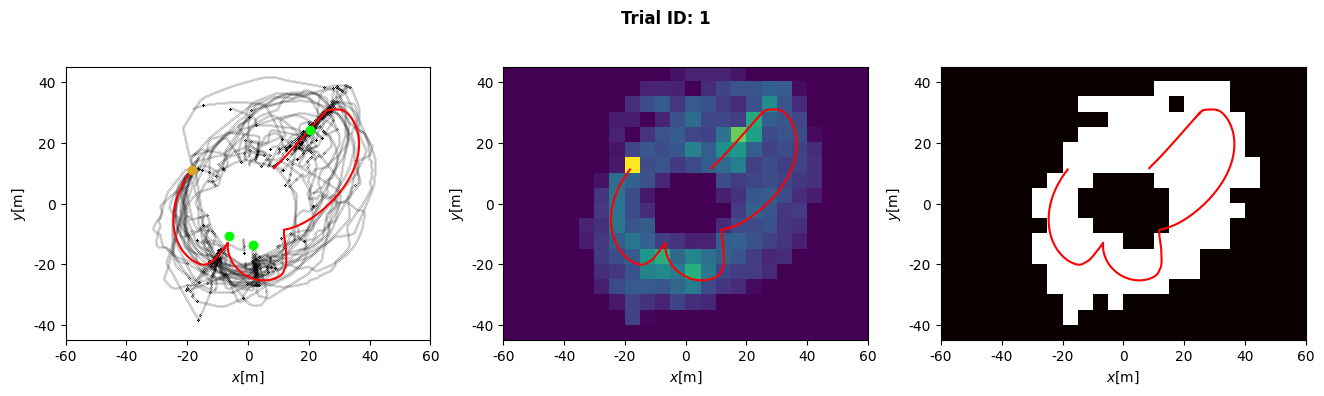

<Figure size 640x480 with 0 Axes>

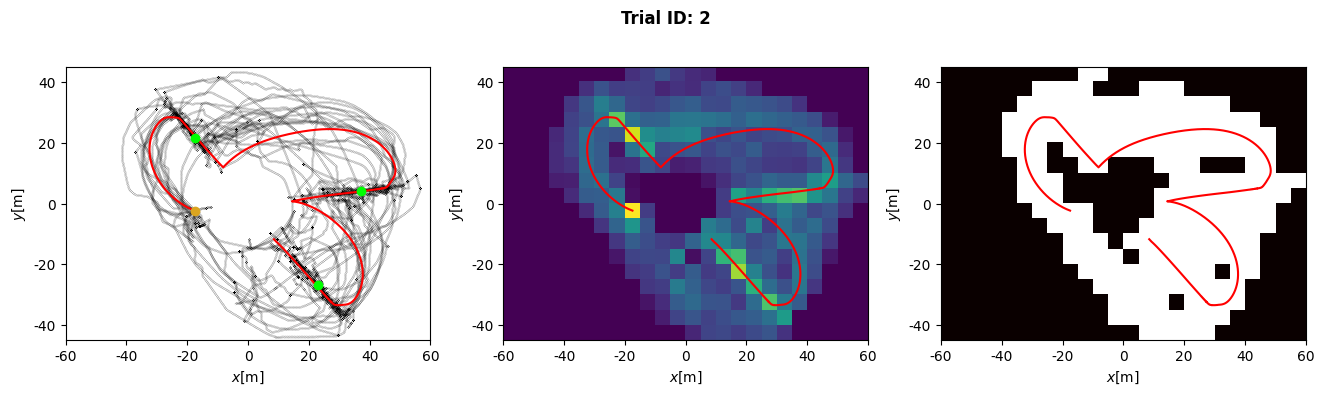

<Figure size 640x480 with 0 Axes>

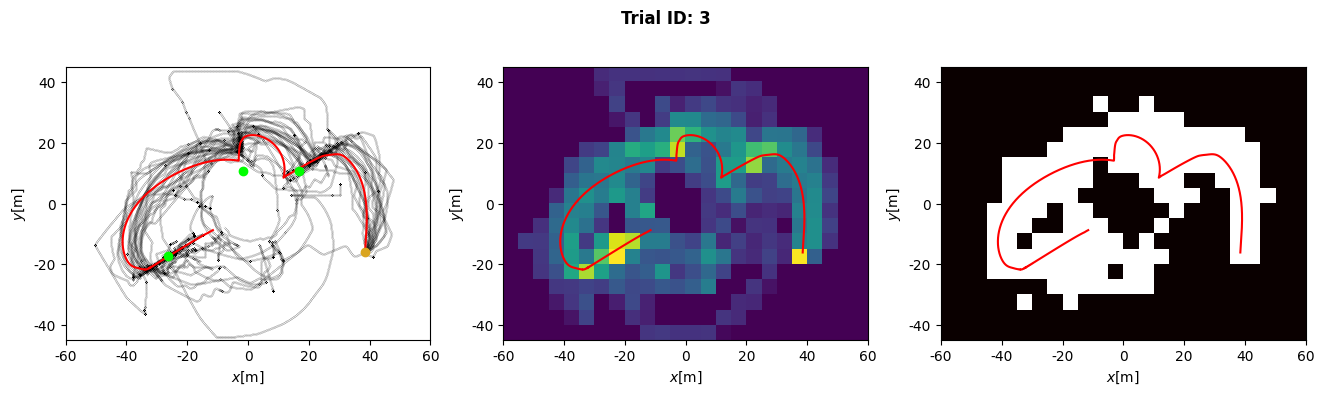

<Figure size 640x480 with 0 Axes>

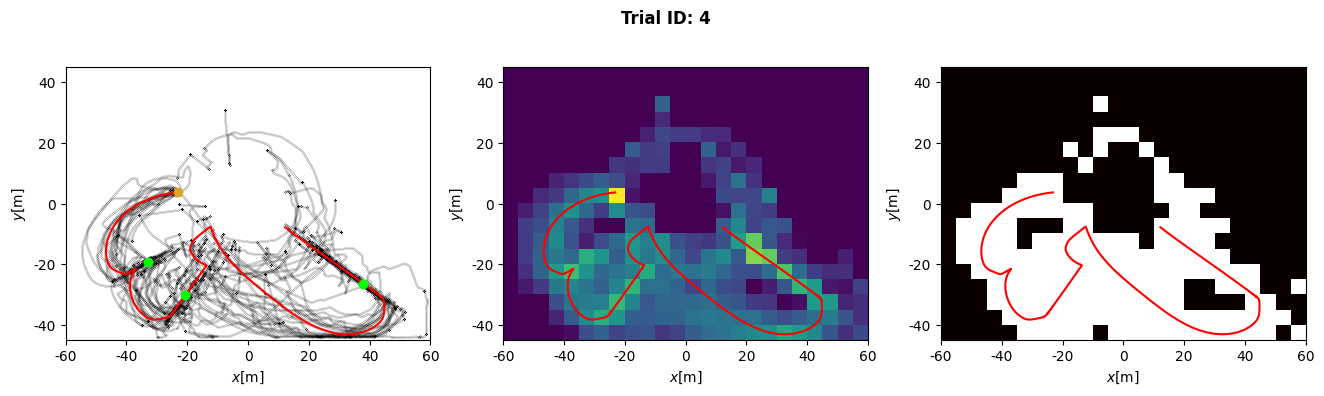

<Figure size 640x480 with 0 Axes>

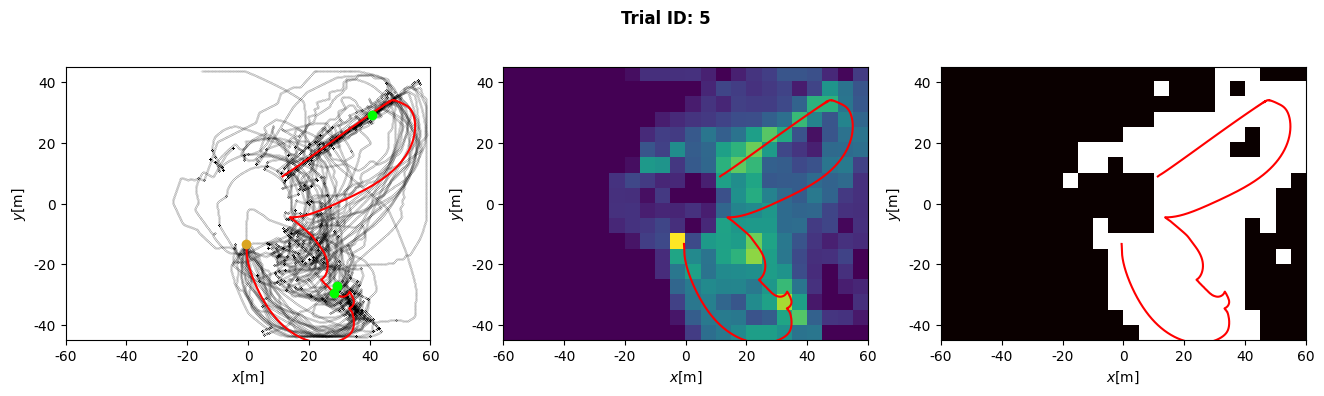

<Figure size 640x480 with 0 Axes>

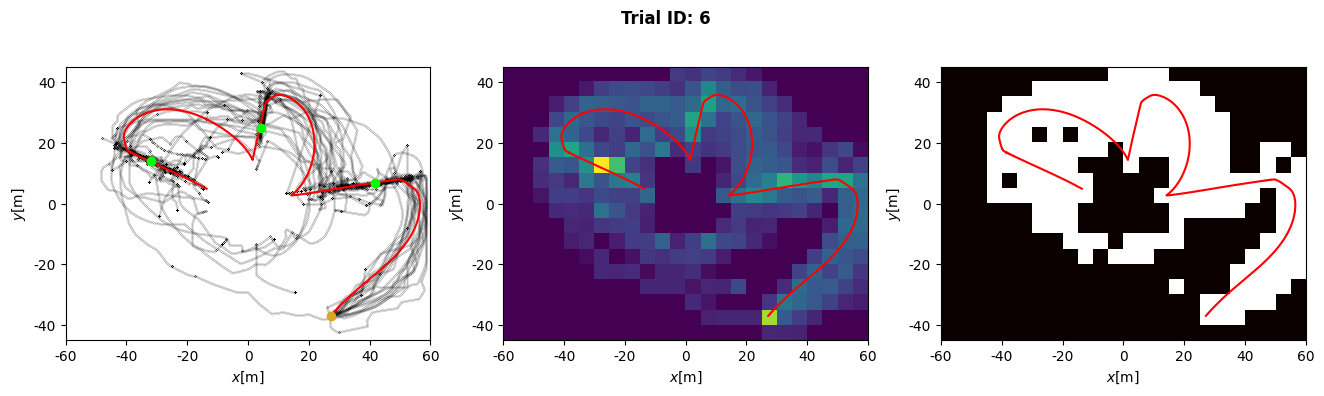

<Figure size 640x480 with 0 Axes>

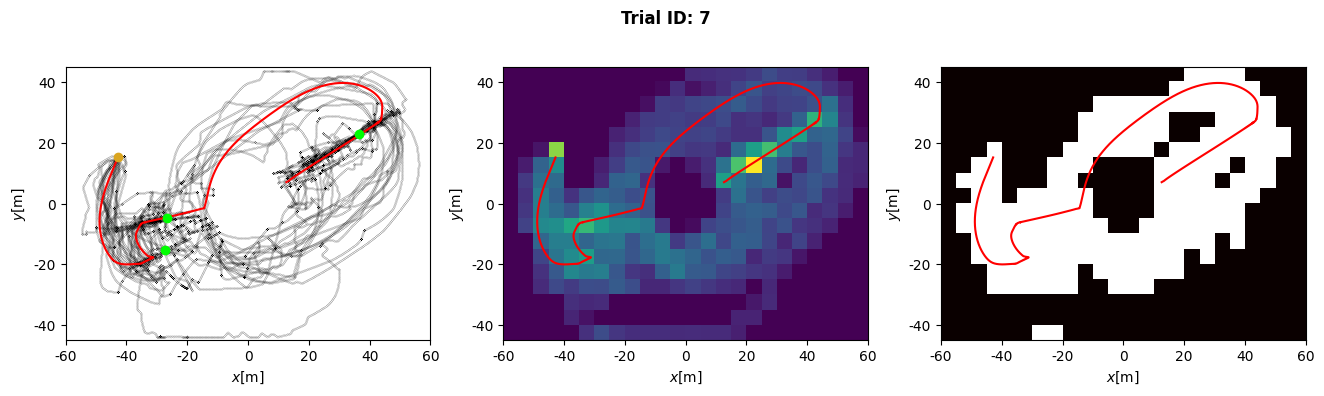

<Figure size 640x480 with 0 Axes>

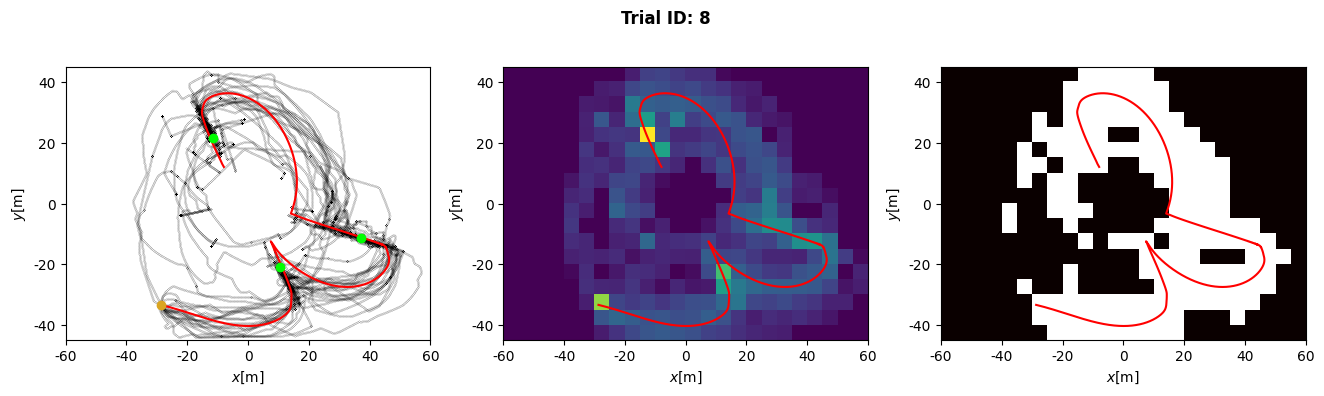

<Figure size 640x480 with 0 Axes>

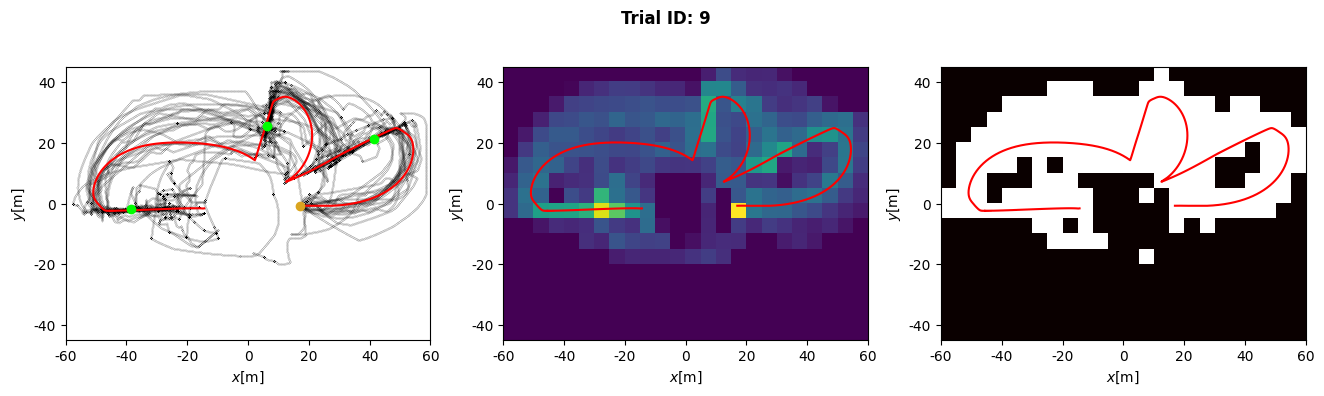

<Figure size 640x480 with 0 Axes>

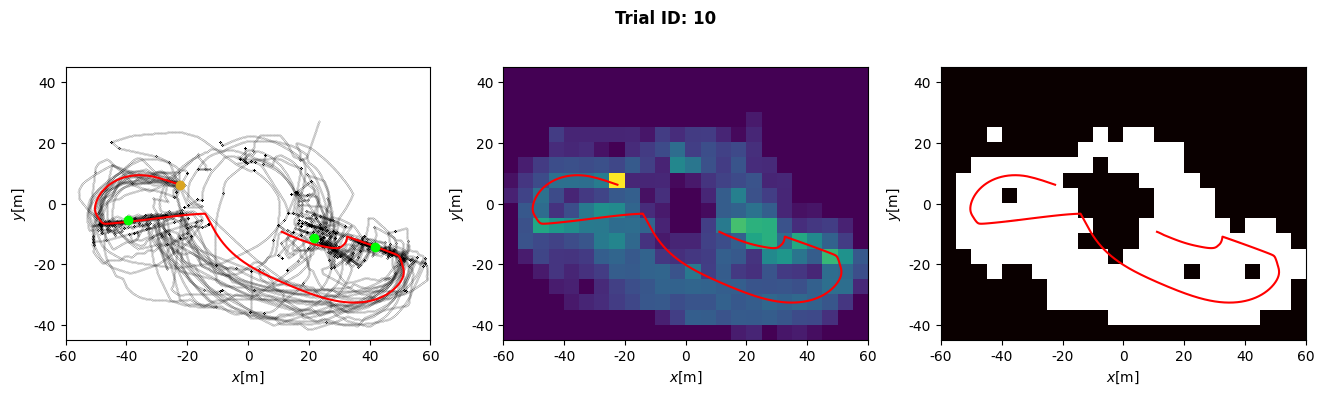

<Figure size 640x480 with 0 Axes>

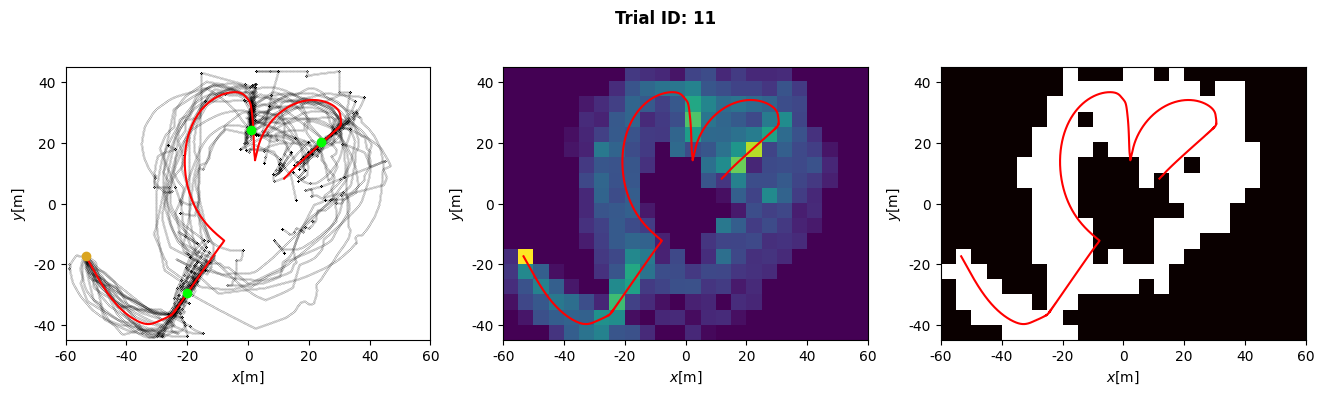

<Figure size 640x480 with 0 Axes>

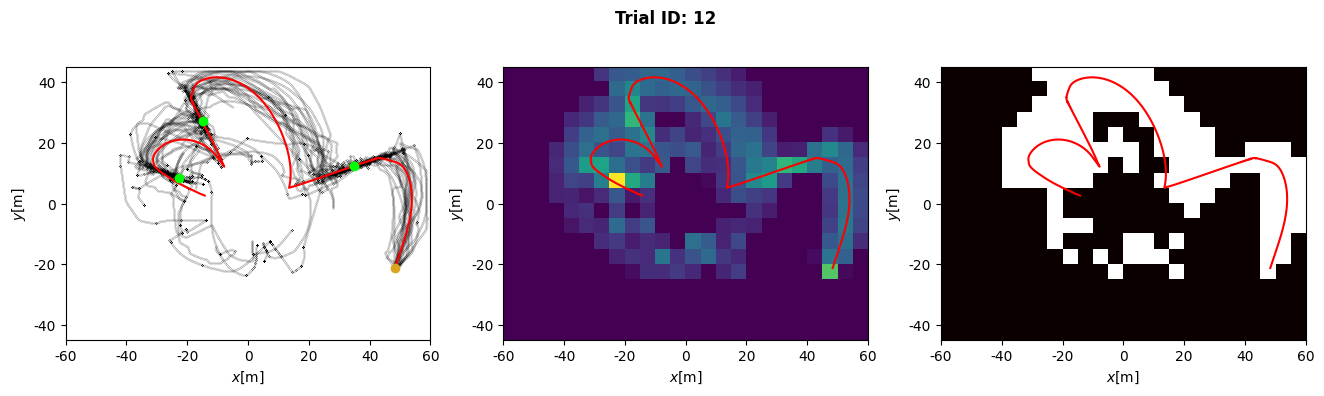

<Figure size 640x480 with 0 Axes>

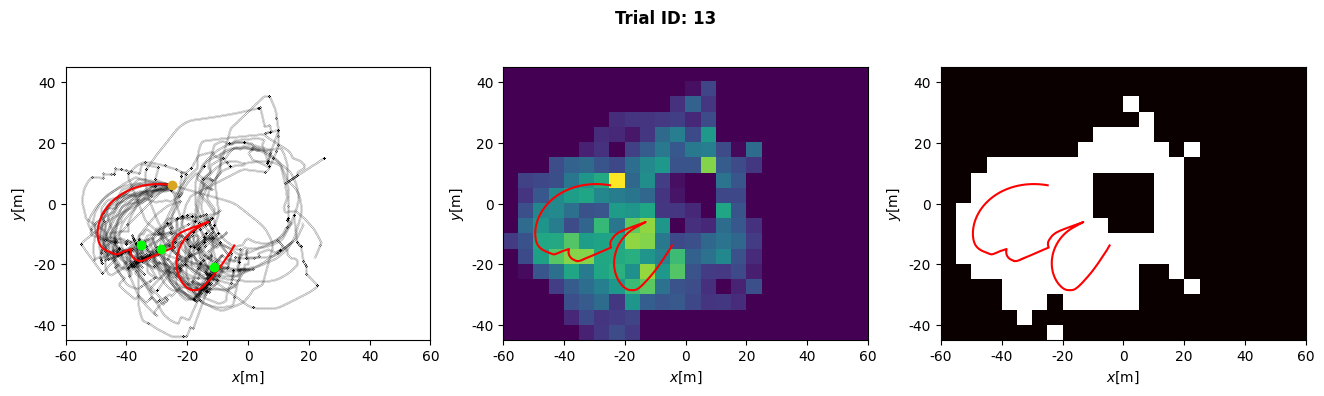

<Figure size 640x480 with 0 Axes>

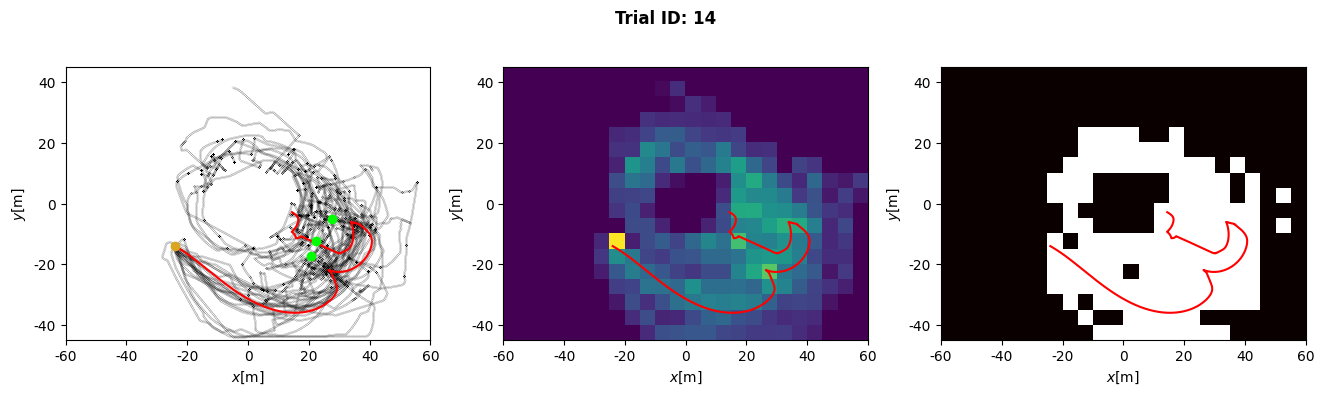

<Figure size 640x480 with 0 Axes>

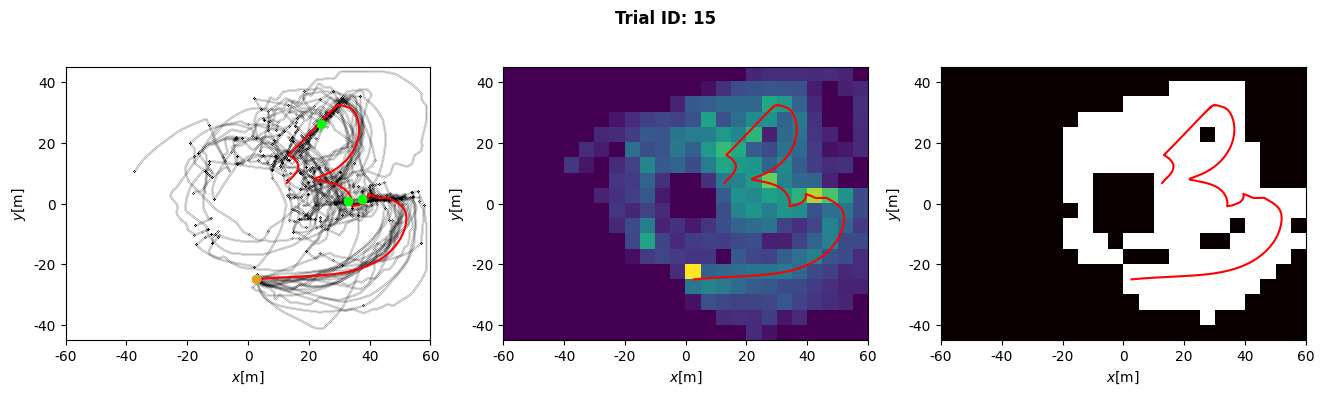

<Figure size 640x480 with 0 Axes>

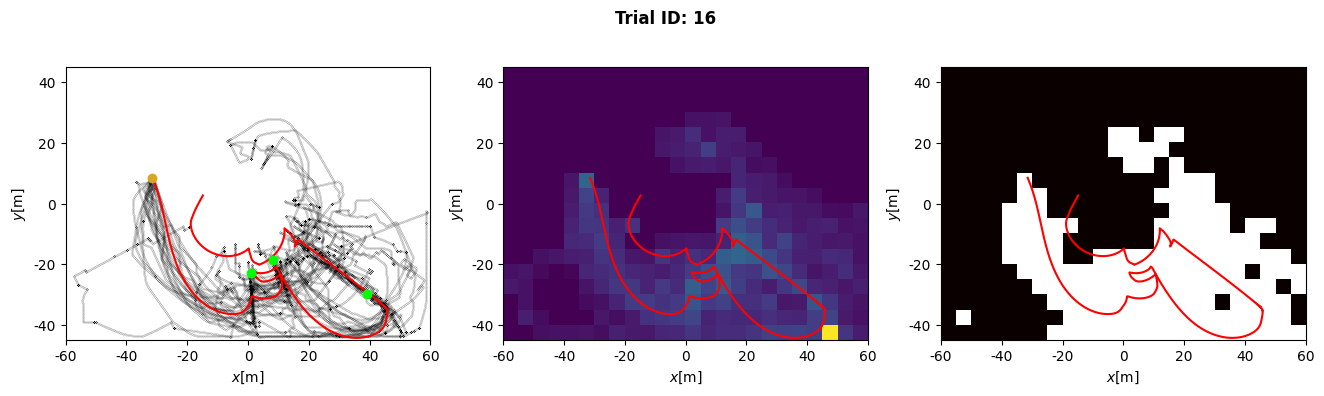

<Figure size 640x480 with 0 Axes>

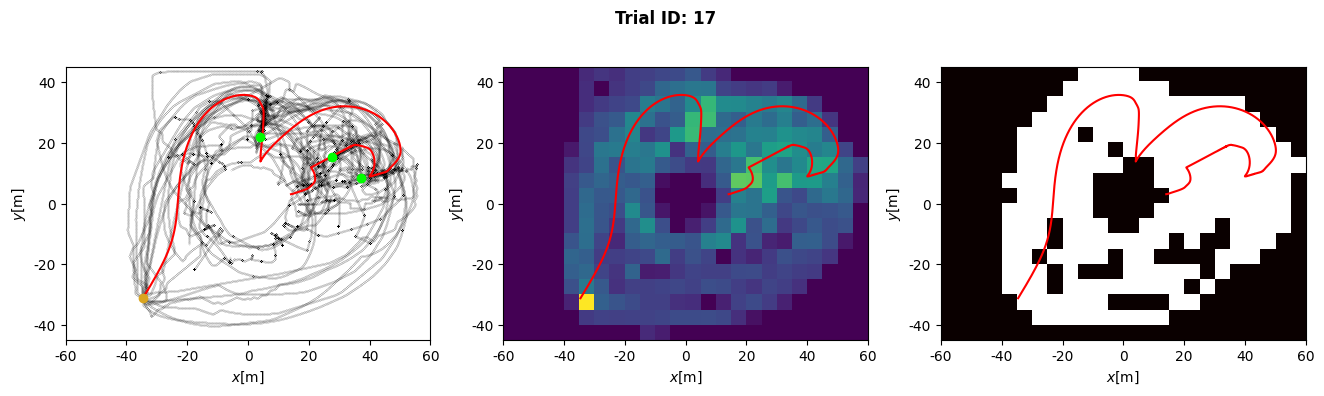

<Figure size 640x480 with 0 Axes>

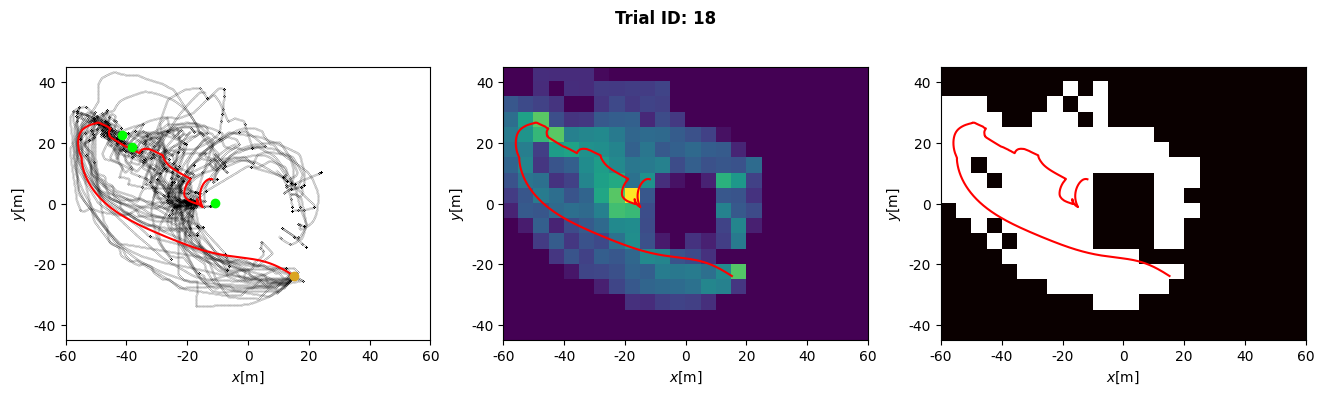

<Figure size 640x480 with 0 Axes>

In [5]:
plt.close()
tcount = 0
traces_sim = np.zeros(last_trial-first_trial) -1
traces_human = np.zeros((last_trial-first_trial, numPlayers)) -1
if savefig:
    os.mkdir(savefig_dir)
for trial in range(first_trial,last_trial):
    X = np.array([])
    Z = np.array([])
    trial_ID = "{:02}".format(trial)
    filePaths = [path for path in dataDir.rglob('*trialIdentifier'+trial_ID+'*')] #first get all the participants for that trial ID
    for filePath in filePaths: # for each participant with the given trial ID
        trialData = pd.read_csv(filePath)
        X = np.append(X, trialData.p0x.to_numpy())
        Z = np.append(Z, trialData.p0z.to_numpy())

    simFile = [path for path in simDir.rglob('*trialIdentifier'+trial_ID+'*')][0] #[0] because there should be just one file
    simData = pd.read_csv(simFile)
    
    h, xedges, yedges = np.histogram2d(x = X.flatten(), y = Z.flatten(),  bins = (int(120/bin_size), int(90/bin_size)), range = ((-xlim, xlim), (-ylim,ylim)))
        
    
    fig, _ = plt.subplots(1, 3, figsize=(16,4))
    axes = fig.get_axes()
    
    ax1 = axes[0]
    ax2 = axes[1]
    ax3 = axes[2]
    
    
    ax1.plot(X, Z, 'k.',  markersize = .05)
    ax1.plot(simData.hA0x, simData.hA0z, color = 'r' )
    ax1.plot(trialData.t0x[0], trialData.t0z[0], color = 'lime', marker = 'o')
    ax1.plot(trialData.t1x[0], trialData.t1z[0], color = 'lime', marker = 'o')
    ax1.plot(trialData.t2x[0], trialData.t2z[0], color = 'lime', marker = 'o')
    ax1.plot(trialData.p0x[0], trialData.p0z[0], color='goldenrod', marker = 'o')
    ax1.set_xlim(left = -xlim, right = xlim)
    ax1.set_ylim(bottom=-ylim, top=ylim)
    ax1.set_xlabel(r'$x[\mathrm{m}]$')
    ax1.set_ylabel(r'$y[\mathrm{m}]$')
    ax1.set_xticks(ticks=(-60,-40,-20,0,20,40,60), labels = (-60,-40,-20,0,20,40,60))
    ax1.set_yticks(ticks = (-40, -20, 0, 20,40), labels = (-40, -20, 0, 20,40))
    ax1.set_aspect('equal')
    
    
    weighted_heatmap = np.sqrt((h.T[::-1]))
    pos = ax2.matshow(weighted_heatmap)# ,aspect = 90/120)
    ax2.plot(simData.hA0x*np.shape(h)[0]/(xlim*2) + np.shape(h)[0]/2 - 1/2, -simData.hA0z*np.shape(h)[1]/(ylim*2) + np.shape(h)[1]/2 - 1/2,  color = 'r' )
    ax2.set_xticks(ticks = np.arange(numTicksX) * np.shape(h)[0] / (numTicksX -1) - .5, labels=(-60,-40,-20,0,20,40,60))
    ax2.set_yticks(ticks = np.arange(numTicksY) * 4 + 1 -.5 , labels=(40, 20, 0, -20,-40)) #hack to get right labels
    ax2.get_xaxis().set_visible(True)
    ax2.xaxis.tick_bottom()
    ax2.get_yaxis().set_visible(True)
    ax2.set_xlabel(r'$x[\mathrm{m}]$')
    ax2.set_ylabel(r'$y[\mathrm{m}]$')
    ax2.set_xlim(left = -xlim*np.shape(h)[0]/(xlim*2) + np.shape(h)[0]/2 - 1/2, right = xlim*np.shape(h)[0]/(xlim*2) + np.shape(h)[0]/2 - 1/2)
    ax2.set_ylim(bottom=ylim*np.shape(h)[1]/(ylim*2) + np.shape(h)[1]/2 - 1/2, top=-ylim*np.shape(h)[1]/(ylim*2) + np.shape(h)[1]/2 - 1/2)

    
    binary_heatmap = weighted_heatmap > threshold
    ax3.matshow(binary_heatmap, cmap='hot')# ,aspect = 90/120)
    ax3.plot(simData.hA0x*np.shape(h)[0]/(xlim*2) + np.shape(h)[0]/2 - 1/2, -simData.hA0z*np.shape(h)[1]/(ylim*2) + np.shape(h)[1]/2 - 1/2,  color = 'r' )
    ax3.set_xticks(ticks = np.arange(numTicksX) * np.shape(h)[0] / (numTicksX -1) - .5, labels=(-60,-40,-20,0,20,40,60))
    ax3.set_yticks(ticks = np.arange(numTicksY) * 4 + 1 -.5 , labels=(40, 20, 0, -20,-40)) #hack to get right labels
    ax3.get_xaxis().set_visible(True)
    ax3.xaxis.tick_bottom()
    ax3.get_yaxis().set_visible(True)
    ax3.set_xlabel(r'$x[\mathrm{m}]$')
    ax3.set_ylabel(r'$y[\mathrm{m}]$')
    ax3.set_xlim(left = -xlim*np.shape(h)[0]/(xlim*2) + np.shape(h)[0]/2 - 1/2, right = xlim*np.shape(h)[0]/(xlim*2) + np.shape(h)[0]/2 - 1/2)
    ax3.set_ylim(bottom=ylim*np.shape(h)[1]/(ylim*2) + np.shape(h)[1]/2 - 1/2, top=-ylim*np.shape(h)[1]/(ylim*2) + np.shape(h)[1]/2 - 1/2)

    #plt.colorbar(pos)
    
    
    metric = weighted_heatmap if weighted_eval else binary_heatmap
    
    
    traces_sim[tcount] = trace(metric, np.array([simData.hA0x.to_numpy(), simData.hA0z.to_numpy()]).T, bin_size = bin_size, xlim = xlim, ylim = ylim)
    
    hcount = 0
    for filePath in filePaths: # for each participant with the given trial ID
        trialData = pd.read_csv(filePath)
        traces_human[tcount][hcount] = trace(metric, np.array([trialData.p0x.to_numpy(), trialData.p0z.to_numpy()]).T, bin_size = bin_size, xlim = xlim, ylim = ylim)
        hcount += 1
    
    tcount += 1
    
    fig.suptitle("Trial ID: " + str(trial-6), fontweight = 'bold')
    
    if savefig:
        plt.savefig(savefig_dir + "\ExperimentB_trial_ID_" + trial_ID)
    plt.figure()


In [6]:
columns = ["Trial", "Mean", "SD", "Sim"]
table = pd.DataFrame(np.array([np.arange(first_trial, last_trial),np.mean(traces_human, axis = 1), np.std(traces_human, axis = 1), traces_sim]).T, columns = columns).astype({"Trial":"int"})
meanRow =table.apply(['mean'])
meanRow.Trial['mean'] = "Average"
output = pd.concat([table, meanRow]).round(2)

In [7]:
print(output.to_latex(index=False))

\begin{tabular}{lrrr}
\toprule
  Trial &  Mean &   SD &   Sim \\
\midrule
      7 & 23.55 & 2.06 & 25.34 \\
      8 & 21.87 & 1.83 & 24.34 \\
      9 & 23.38 & 2.96 & 25.99 \\
     10 & 24.48 & 1.97 & 27.25 \\
     11 & 24.27 & 1.66 & 27.59 \\
     12 & 23.38 & 2.68 & 25.32 \\
     13 & 22.42 & 1.65 & 24.34 \\
     14 & 23.45 & 2.71 & 25.24 \\
     15 & 24.31 & 2.04 & 26.73 \\
     16 & 23.85 & 1.85 & 25.15 \\
     17 & 22.51 & 2.29 & 24.40 \\
     18 & 25.70 & 2.24 & 27.11 \\
     19 & 24.53 & 3.11 & 28.22 \\
     20 & 23.88 & 2.42 & 25.48 \\
     21 & 23.54 & 1.95 & 27.59 \\
     22 & 24.66 & 2.91 & 23.86 \\
     23 & 21.05 & 1.99 & 22.11 \\
     24 & 23.92 & 1.62 & 25.79 \\
Average & 23.60 & 2.22 & 25.66 \\
\bottomrule
\end{tabular}



C:\Users\MQ20208365\AppData\Local\Temp\ipykernel_19636\1986106801.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(output.to_latex(index=False))


In [8]:
ttest(np.mean(traces_human, axis = 1), traces_sim)

Ttest_indResult(statistic=-4.578117104805979, pvalue=6.0113630484969326e-05)

In [9]:
jasp_input = pd.DataFrame({"Value": [*table.Mean.tolist(), *table.Sim.tolist()], "Group": [*['Human']*numTrials, *['Simulation']*numTrials]})
save_id = "Weighted" if weighted_eval else "Binary"
#jasp_input.to_csv("./Tables/ExperimentB/"+save_id+".csv", index = False)